<a href="https://colab.research.google.com/github/athravjoshi/EDA-ML-predictions/blob/main/Blackfriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importing the DS


In [60]:
df_train= pd.read_csv('/content/train.csv')
df_test= pd.read_csv('/content/test.csv')

Problem Statement



A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [61]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [62]:
df_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [63]:
df_train.shape

(550068, 12)

In [64]:
df_test.shape

(233599, 11)

In [65]:
#merge both test and Train
df=pd.concat([df_train, df_test], ignore_index=True)

In [66]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [67]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [69]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [70]:
df.drop(['User_ID'],axis=1,inplace=True)

In [71]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [72]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809


In [73]:
pd.get_dummies(df['Gender'])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,True,False


In [74]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [75]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


handle Categorical feaure Age


In [76]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [77]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [78]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder=LabelEncoder()
# df['Age']=label_encoder.fit_transform(df['Age'])
# df['Age'].unique()

In [79]:
df['Age']

,Age
0,1
1,1
2,1
3,1
4,7
...,...
783662,3
783663,3
783664,3
783665,5


In [80]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [81]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [82]:
# df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,False,True


In [83]:
df=pd.concat([df,df_city],axis=1)

df.drop('City_Category',axis=1,inplace=True)

In [84]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


In [85]:
#missing values
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


In [86]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [87]:
df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [88]:
df['Product_Category_2']=df['Product_Category_2'].fillna(0)

In [89]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,545809
Purchase,233599


In [90]:
df['Product_Category_3']=df['Product_Category_3'].fillna(0)

In [91]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0
Purchase,233599


In [92]:
df = pd.get_dummies(df, columns=['Occupation','Product_Category_1', 'Product_Category_2', 'Product_Category_3'], drop_first=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Purchase                    550068 non-null  float64
 6   B                           783667 non-null  bool   
 7   C                           783667 non-null  bool   
 8   Occupation_1                783667 non-null  bool   
 9   Occupation_2                783667 non-null  bool   
 10  Occupation_3                783667 non-null  bool   
 11  Occupation_4                783667 non-null  bool   
 12  Occupation_5                783667 non-null  bool   
 13  Occupation_6  

In [94]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [95]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace("+","")

In [96]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [97]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Purchase                    550068 non-null  float64
 6   B                           783667 non-null  bool   
 7   C                           783667 non-null  bool   
 8   Occupation_1                783667 non-null  bool   
 9   Occupation_2                783667 non-null  bool   
 10  Occupation_3                783667 non-null  bool   
 11  Occupation_4                783667 non-null  bool   
 12  Occupation_5                783667 non-null  bool   
 13  Occupation_6  

In [99]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

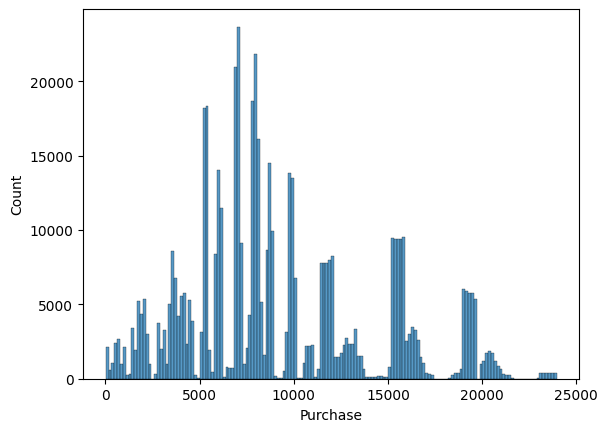

In [100]:
sns.histplot(df['Purchase'])
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

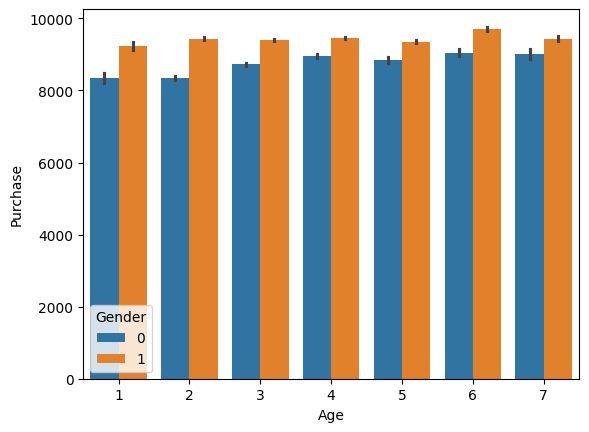

In [101]:
sns.barplot(x='Age',y='Purchase',hue='Gender', data=df)

In [102]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender', data=df)

ValueError: Could not interpret value `Occupation` for `x`. An entry with this name does not appear in `data`.

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender', data=df)
plt.title('Purchase vs product 1 with gender')
plt.xlabel('product 1')
plt.ylabel('Purchase Amount')
plt.show()

In [ ]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender', data=df)
plt.title('Purchase vs product 2 with gender')
plt.xlabel('product 2')
plt.ylabel('Purchase Amount')
plt.show()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Purchase                    550068 non-null  float64
 6   B                           783667 non-null  int64  
 7   C                           783667 non-null  int64  
 8   Occupation_1                783667 non-null  bool   
 9   Occupation_2                783667 non-null  bool   
 10  Occupation_3                783667 non-null  bool   
 11  Occupation_4                783667 non-null  bool   
 12  Occupation_5                783667 non-null  bool   
 13  Occupation_6  

In [ ]:
# X = train.drop(columns=['Purchase',  'Product_ID'])  # Exclude irrelevant columns
# y = train['Purchase']

In [104]:
# Split into train and test
df_train = df[~df['Purchase'].isnull()]
df_test = df[df['Purchase'].isnull()]

In [105]:
X = df_train.drop(columns=['Purchase',  'Product_ID'])  # Exclude irrelevant columns
y = df_train['Purchase']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the Split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (440054, 77)
X_test shape: (110014, 77)
y_train shape: (440054,)
y_test shape: (110014,)


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [108]:
model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# lr_mse=mean_squared_error(y_test,y_pred)
# lr_mae=mean_absolute_error(y_test,y_pred)
# lr_r2=r2_score(y_test,y_pred)

# print("Mean Squared Error:", lr_mse)
# print("Mean Absolute Error:", lr_mae)
# print("R-squared:", lr_r2)

In [109]:

# Calculate Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test, y_pred)

# Manually calculate RMSE by taking the square root of MSE
lr_rmse = np.sqrt(lr_mse)

# Calculate R² (R-squared)
lr_r2 = r2_score(y_test, y_pred)

# Calculate MAE
lr_mae = mean_absolute_error(y_test, y_pred)


print("Mean Absolute Error (MAE):", lr_mae)
print('RMSE:', lr_rmse)
print('R²:', lr_r2)

Mean Absolute Error (MAE): 2262.415500712372
RMSE: 2999.5636633493887
R²: 0.6419120538733407


In [110]:
coeffecient= model.coef_
importance_df_lr= pd.DataFrame({'Feature': X_train.columns,
    'Coefficient': coeffecient})
# important_df_lr=important_df_lr.sort_values(by='Coefficient', ascending=False).index()
importance_df_lr = importance_df_lr.reindex(importance_df_lr['Coefficient'].abs().sort_values(ascending=False).index)
importance_df_lr

,Feature,Coefficient
43,Product_Category_1_19,-13552.096920
44,Product_Category_1_20,-13202.567630
37,Product_Category_1_13,-12762.479313
36,Product_Category_1_12,-12151.714638
28,Product_Category_1_4,-10927.596752
...,...,...
10,Occupation_5,44.992009
7,Occupation_2,36.613693
18,Occupation_13,25.523744
23,Occupation_18,-6.738530


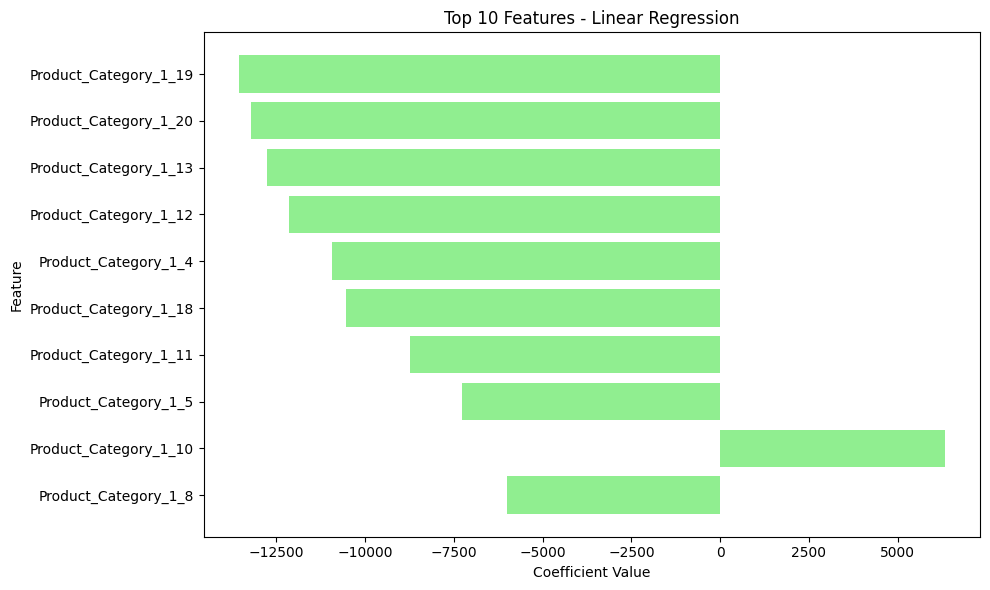

Linear Regression feature importance plot saved.


In [111]:
top_n_lr = importance_df_lr.head(10)

# Plot the top 10 important features for Linear Regression
plt.figure(figsize=(10, 6)) # Increase the size of the plot
plt.barh(top_n_lr['Feature'], top_n_lr['Coefficient'], color='lightgreen')
plt.gca().invert_yaxis()  # Reverse the order of the features for better readability
plt.title('Top 10 Features - Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust layout to fit everything
plt.savefig('linear_regression_feature_importance.png')
plt.show()

print("Linear Regression feature importance plot saved.")

In [112]:
 # Combine predictions and actuals in a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2)})
print(comparison.head())

         Actual  Predicted
84432   19142.0   13810.92
72724   15513.0   13434.55
197032   7802.0    7029.78
353704  15455.0   13120.62
91198    4492.0   15844.66


In [113]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Model Evaluation:")
print("Mean Absolute Error (MAE):", xgb_mae)
print('RMSE:', xgb_rmse)
print('R²:', xgb_r2)

XGBoost Model Evaluation:
Mean Absolute Error (MAE): 2234.592602857348
RMSE: 2966.8376829699832
R²: 0.649683085276575


In [114]:
import joblib

# Save the XGBoost model
filename = 'xgboost_model.pkl'
joblib.dump(xgb_model, filename)

print(f"XGBoost model saved to {filename}")

XGBoost model saved to xgboost_model.pkl
